In [2]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [6]:
## imbalanced dataset

X , y = make_classification(n_samples = 10000 , n_features = 2 , n_clusters_per_class = 1 , n_redundant = 0 , weights = [0.99] , random_state = 10)


In [7]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [8]:
Counter(y)

Counter({0: 9846, 1: 154})

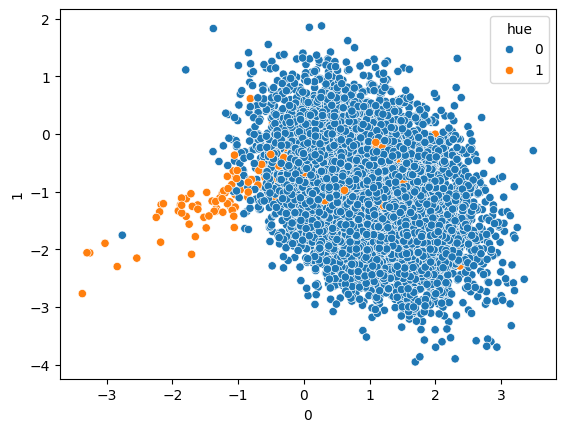

In [15]:
# import seaborn as sns
# import pandas as pd

# sns.scatterplot(pd.DataFrame(X)[0], pd.DataFrame(X)[1] , hue = y)

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with columns named 'x' and 'y'
df = pd.DataFrame(X, columns=['x', 'y'])
df['hue'] = y  # Add the 'hue' column

# Use the 'data', 'x', 'y', and 'hue' parameters
sns.scatterplot(data=df, x='x', y='y', hue='hue')

# Set x and y labels
plt.xlabel("0")
plt.ylabel("1")

plt.show() # Display the plot

In [16]:
# train test split

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 0)

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

penalty = ['l1','l2','elasticnet']
c_values = [100,10,1,0.1,0.01]
solver = ['newton-ng','lbfgs','liblinear','sag','saga']

In [18]:
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [19]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [20]:
params = dict(penalty = penalty , C = c_values , solver = solver , class_weight = class_weight)

In [21]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1, 0.1, 0.01],
 'solver': ['newton-ng', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [24]:
cv =  StratifiedKFold()
grid = GridSearchCV(estimator = model , param_grid = params ,scoring = "accuracy",  cv = cv )

In [25]:
grid.fit(X_train , y_train )

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-ng', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [26]:
grid.best_params_

{'C': 0.01, 'class_weight': {0: 10, 1: 50}, 'penalty': 'l2', 'solver': 'lbfgs'}

In [27]:
grid.best_score_

0.9881333333333334

In [28]:
y_pred = grid.predict(X_test)

In [29]:
from sklearn. metrics import confusion_matrix , classification_report , accuracy_score

In [35]:
cm = confusion_matrix(y_test , y_pred)
print('Confusion Matrix:\n',cm,'\n')

score = accuracy_score(y_test , y_pred)
print('accuracy: ',score,'\n')

report = classification_report(y_test , y_pred)
print(report)

Confusion Matrix:
 [[2468    2]
 [  18   12]] 

accuracy:  0.992 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2470
           1       0.86      0.40      0.55        30

    accuracy                           0.99      2500
   macro avg       0.92      0.70      0.77      2500
weighted avg       0.99      0.99      0.99      2500

